In [40]:
import pandas as pd
import torch

In [61]:
#import needed data
df = pd.read_csv('./weather_data/OBS_ASOS_TIM_20230216162904.csv', encoding='cp949')
pv = pd.read_csv('./processed_data/pv/week_2021_PV.csv')
load = pd.read_csv("./processed_data/week_2021_load.csv", index_col = 0)

load_index = load.index
pv.rename(columns = {'Unnamed: 0': 'date'}, inplace = True)
pv = pv.set_index('date')
pv = pv.reindex(load_index)

# drop useless columns and fill 0 instead of Nan
df = df.drop(columns=['지점', '지점명'])
df = df.fillna(0)
# df columns: ['일시', '기온(°C)', '풍속(m/s)', '습도(%)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)', '중하층운량(10분위)']

In [62]:
# modify date(일시) string into integer to convert the value to tensor.
# set '일시' as index of df
from datetime import datetime

df_len = len(df['일시'])
df_date_list = df['일시']
mdi_df_date_list = []

for i in range(df_len):
    date = df_date_list[i]
    date_time_obj = datetime.strptime(date, '%Y-%m-%d %H:%M')
    mdi_date = (date_time_obj.year-2000)*10000 + date_time_obj.month*100 + date_time_obj.day
    mdi_df_date_list.append(mdi_date)
    
df['일시'] = mdi_df_date_list
df = df.set_index('일시', drop=True)

In [64]:
pv

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
210104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8,104.2,...,447.8,111.4,59.7,14.3,0.0,0.0,0.0,0.0,0.0,0.0
210105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1,69.4,...,282.5,107.3,79.0,15.4,0.0,0.0,0.0,0.0,0.0,0.0
210106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6,48.2,...,487.7,361.1,232.6,7.4,0.0,0.0,0.0,0.0,0.0,0.0
210107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,...,2.9,1.6,0.1,0.5,0.0,0.0,0.0,0.0,0.0,0.0
210108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,1.1,...,4.7,17.1,9.2,0.8,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,101.3,...,374.7,299.6,130.9,9.6,0.0,0.0,0.0,0.0,0.0,0.0
211227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.8,161.1,...,286.6,57.4,37.5,2.2,0.0,0.0,0.0,0.0,0.0,0.0
211228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2,73.7,...,88.7,63.8,15.0,1.4,0.0,0.0,0.0,0.0,0.0,0.0
211229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.6,68.2,...,64.0,54.3,176.4,9.6,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# pv 발전량이 6시부터 발생하는 것을 확인
# 211224 데이터가 비정상적이므로 사용할 데이터에서 1224일의 데이터는 기각
pv.loc[pv['6'] != 0.0]

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
210414,0.0,0.0,0.0,0.0,0.0,0.0,0.1,33.6,121.1,352.7,...,674.6,594.1,497.7,322.7,117.9,1.1,0.0,0.0,0.0,0.0
210419,0.0,0.0,0.0,0.0,0.0,0.0,0.6,38.2,179.1,365.2,...,657.5,591.5,471.0,292.2,108.3,1.2,0.0,0.0,0.0,0.0
210420,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.4,170.3,349.6,...,623.1,556.4,440.9,274.9,97.1,1.1,0.0,0.0,0.0,0.0
210421,0.0,0.0,0.0,0.0,0.0,0.0,0.3,51.8,132.4,385.1,...,347.5,205.3,90.8,119.3,31.0,0.5,0.0,0.0,0.0,0.0
210422,0.0,0.0,0.0,0.0,0.0,0.0,0.1,27.1,136.7,229.3,...,230.2,161.0,97.1,12.4,9.6,0.8,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210813,0.0,0.0,0.0,0.0,0.0,0.0,0.1,29.1,73.6,101.7,...,577.9,346.9,235.6,102.9,41.6,0.1,0.0,0.0,0.0,0.0
210816,0.0,0.0,0.0,0.0,0.0,0.0,0.2,26.5,145.1,304.8,...,571.3,150.7,99.7,86.0,62.8,4.3,0.0,0.0,0.0,0.0
210818,0.0,0.0,0.0,0.0,0.0,0.0,0.9,38.7,85.7,386.2,...,142.1,45.7,24.3,2.0,7.2,2.8,0.0,0.0,0.0,0.0
210820,0.0,0.0,0.0,0.0,0.0,0.0,0.2,35.7,149.2,304.7,...,241.1,625.9,469.4,110.6,23.8,1.0,0.0,0.0,0.0,0.0


In [66]:
# pv 발전량은 21시 이후에는 전혀 없는 것을 확인
pv.loc[pv['21'] != 0.0]

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23


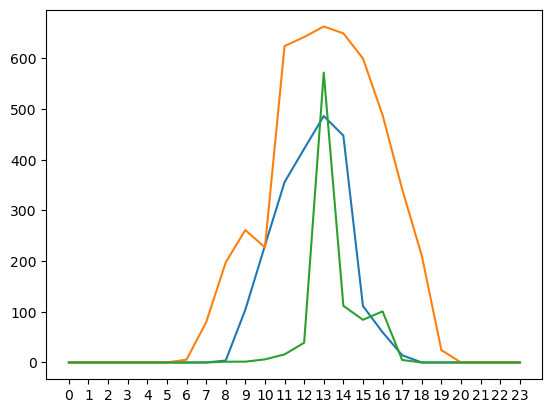

In [67]:
import matplotlib.pyplot as plt

plt.plot(pv.iloc[0])
plt.plot(pv.iloc[100])
plt.plot(pv.iloc[200])

In [68]:
# drop the useless rows of non-intersection date in df
pv_date_list = pv.index

for df_date in df.index:
    if df_date not in pv_date_list:
        try:
            df = df.drop(df_date)
        except:
            KeyError

In [69]:
5616/24

234.0

In [70]:
# reshape the tensors and combine them into one tensor
# 247 days, 24 times, 8(7+1) features
df_tnsr = torch.FloatTensor(df.values)
df_tnsr = df_tnsr.reshape(234,24,7)

pv_tnsr = torch.FloatTensor(pv.values)
pv_tnsr = pv_tnsr.reshape(234,24, 1)

comb_tnsr = torch.cat((df_tnsr, pv_tnsr), dim=2)
comb_tnsr = comb_tnsr.reshape(5616, 8)

In [71]:
comb_df = pd.DataFrame(comb_tnsr).astype('float')

In [72]:
comb_df

,0,1,2,3,4,5,6,7
0,-1.3,0.9,68.0,0.0,0.0,8.0,0.0,0.0
1,-1.2,1.2,70.0,0.0,0.0,7.0,0.0,0.0
2,-2.3,1.3,74.0,0.0,0.0,0.0,0.0,0.0
3,-2.5,0.9,76.0,0.0,0.0,0.0,0.0,0.0
4,-2.5,0.6,77.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5611,2.1,1.8,88.0,0.0,0.0,7.0,7.0,0.0
5612,0.8,1.2,98.0,0.0,0.0,9.0,9.0,0.0
5613,0.5,1.3,99.0,0.0,0.0,9.0,9.0,0.0
5614,0.5,1.7,88.0,0.0,0.0,3.0,3.0,0.0


In [73]:
# rename the column names not to use Korean
# '기온(°C)', '풍속(m/s)', '습도(%)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)', '중하층운량(10분위)', 'PV 발전량'
comb_df.columns = ['TP', 'WS', 'HM', 'SL', 'SR', 'TC', 'MC', 'PV']

In [74]:
corr = comb_df.corr()[['PV']]

In [75]:
corr

,PV
TP,0.254346
WS,0.161104
HM,-0.468103
SL,0.786592
SR,0.928792
TC,-0.211480
MC,-0.170430
PV,1.000000


<AxesSubplot: title={'center': 'Correlation coefficient between features in original weather dataframe'}>

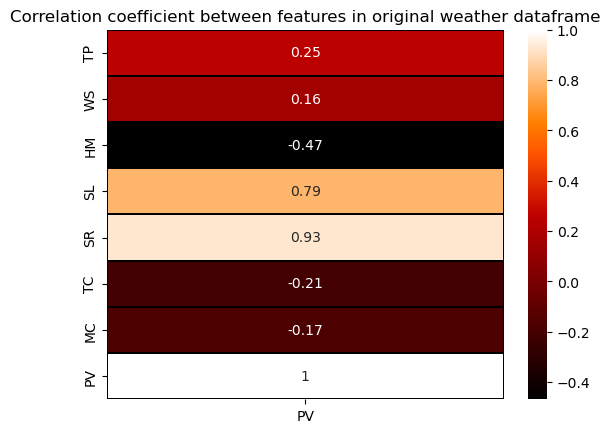

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt


colormap = plt.cm.gist_heat
plt.title("Correlation coefficient between features in original weather dataframe")
sns.heatmap(corr, cmap=colormap, linewidths=0.1, linecolor='black', annot=True)
# SR, SL, HM 상관계수가 꽤 높은 세 feature를 고려할 예정이다.

Text(0.5, 1.0, 'Changes of features for a day')

<Figure size 1000x500 with 0 Axes>

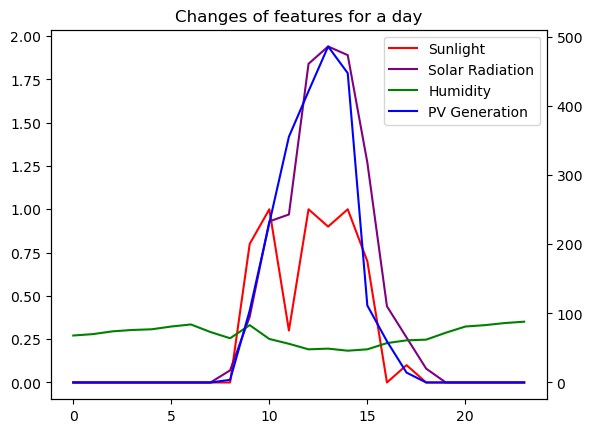

In [89]:
# 상관관계를 상관계수로만 판단하면 왜곡을 간과할 수 있기 때문에 직접 graph를 plot 하여 관계를 확인한다.

plt.figure(figsize=(10,5))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ln1 = ax1.plot(comb_df.iloc[:24]['SL'], label='Sunlight', color='red')
ln2 = ax1.plot(comb_df.iloc[:24]['SR'], label='Solar Radiation', color='purple')
ln3 = ax2.plot(comb_df.iloc[:24]['HM'], label='Humidity', color='green')
ln4 = ax2.plot(comb_df.iloc[:24]['PV'], label='PV Generation', color='blue')

lns = ln1+ln2+ln3+ln4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.title('Changes of features for a day')

# plt.yscale('log')   --> 에러가 난다.. 이유는 모르겠다.

In [78]:
comb_df.to_csv("./processed_data/pv/pv_forecast_features.csv")